In [ ]:
# Import libraries

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [ ]:
# Read specific cleaned dataset and

data = pd.read_csv('lstm_data.csv')
data.head()

,ID,Name,Date,Time,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Datetime
0,AL012004,ALEX,20040731,1800,30.3,-78.3,25,1010,0,0,...,0,0,0,0,0,0,0,0,0,2004-07-31 18:00:00
1,AL012004,ALEX,20040801,0,31.0,-78.8,25,1009,0,0,...,0,0,0,0,0,0,0,0,0,2004-08-01 00:00:00
2,AL012004,ALEX,20040801,600,31.5,-79.0,25,1009,0,0,...,0,0,0,0,0,0,0,0,0,2004-08-01 06:00:00
3,AL012004,ALEX,20040801,1200,31.6,-79.1,30,1009,0,0,...,0,0,0,0,0,0,0,0,0,2004-08-01 12:00:00
4,AL012004,ALEX,20040801,1800,31.6,-79.2,35,1009,0,50,...,0,0,0,0,0,0,0,0,0,2004-08-01 18:00:00


In [ ]:
scaler = MinMaxScaler()
scale = [
    'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure',
    'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
    'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
    'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'
]
data[scale] = scaler.fit_transform(data[scale])

def create_sequences(data, target_col, sequence_length=10):
    sequences = []
    targets = []
    for storm_id in data['ID'].unique():
        storm_data = data[data['ID'] == storm_id]
        storm_features = storm_data[scale].values
        storm_target = storm_data[target_col].values
        for i in range(len(storm_features) - sequence_length):
            sequences.append(storm_features[i:i+sequence_length])
            targets.append(storm_target[i + sequence_length])
    return np.array(sequences), np.array(targets)

sequence_length = 10
target_column = 'Maximum Wind'
sequences, targets = create_sequences(data, target_column, sequence_length)

sequences.shape, targets.shape

((8183, 10, 16), (8183,))

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(sequences, targets, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])),
    LSTM(32, activation='tanh', return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/Users/aidanmurphy/Library/CloudStorage/OneDrive-Personal/GitHub/DATA502/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
fit_model = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0242 - mae: 0.1115 - val_loss: 0.0049 - val_mae: 0.0536
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mae: 0.0461 - val_loss: 0.0026 - val_mae: 0.0348
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0024 - mae: 0.0352 - val_loss: 0.0017 - val_mae: 0.0281
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mae: 0.0299 - val_loss: 0.0016 - val_mae: 0.0289
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mae: 0.0262 - val_loss: 0.0012 - val_mae: 0.0232
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - mae: 0.0244 - val_loss: 0.0011 - val_mae: 0.0219
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.7699e-04 - mae: 0.0218 - val_loss: 0.0011 - val_mae: 0.0249
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - mae: 0.0230 - val_loss: 0.0013 - val_mae: 0.0263
Epoch 9/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

In [ ]:
test_loss, test_mae = model.evaluate(test_X, test_y, verbose=0)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")

Test Loss (MSE): 0.00045634733396582305
Test Mean Absolute Error (MAE): 0.011926990002393723


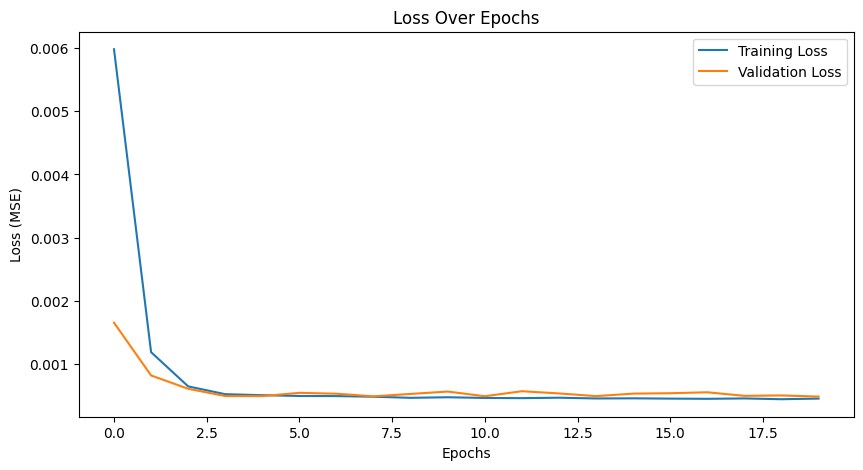

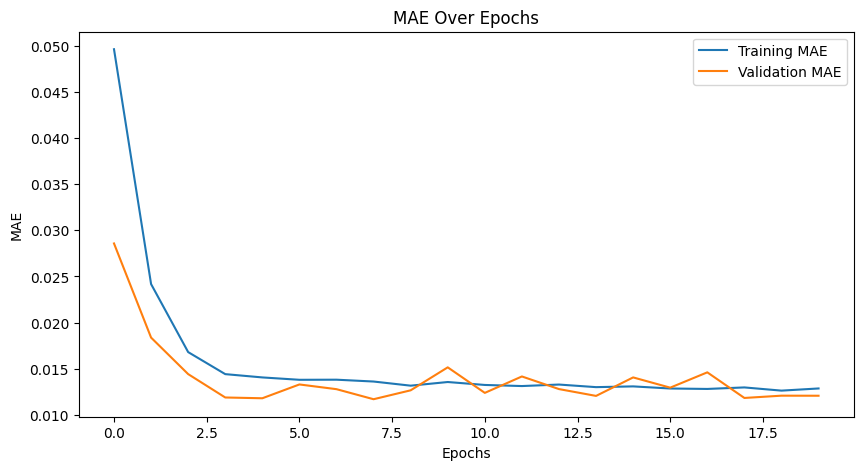

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(fit_model.history['loss'], label='Training Loss')
plt.plot(fit_model.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(fit_model.history['mae'], label='Training MAE')
plt.plot(fit_model.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


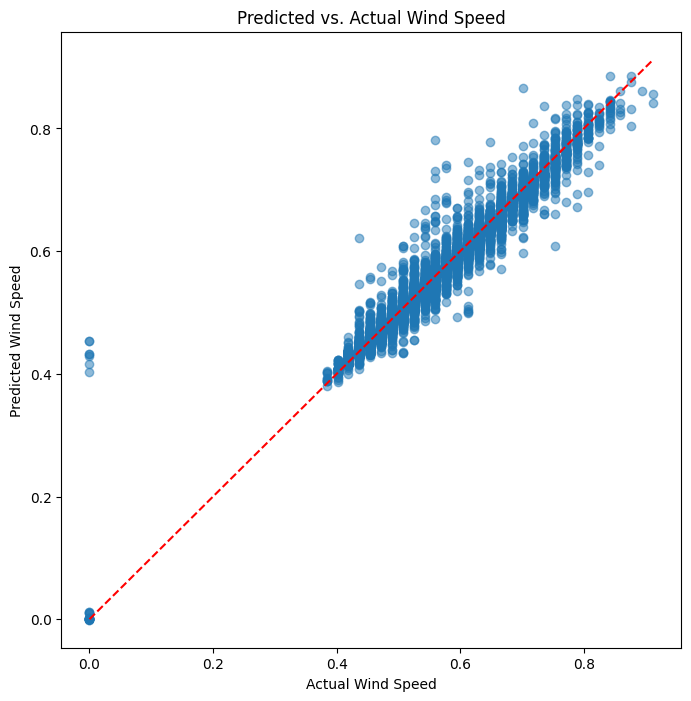

In [ ]:
predictions = model.predict(test_X)

plt.figure(figsize=(8, 8))
plt.scatter(test_y, predictions, alpha=0.5)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linestyle='--')
plt.title('Predicted vs. Actual Wind Speed')
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.show()

In [ ]:
r2 = r2_score(test_y, predictions)
r2

0.9540102165622001